<a href="https://colab.research.google.com/github/axelbynne/T-cnicas-de-Aprendizaje-Autom-tico-MIA---PER-11399/blob/main/Laboratorio_Actividad_1_plantilla_AxelRodriguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los regresores.
- Investigar la aplicación de los modelos de regresión a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [1]:
# cargar el dataset
import pandas as pd

dataset = pd.read_csv('sample_data/AirQualityUCI.csv', delimiter=';')

In [3]:
## ¿cuántas instancias tiene el dataset?
## ¿cuál es el tipo de datos de cada una de las columnas?
import numpy as np

n_instancias = dataset.shape[0]
print(f"Sin depurar tiene {n_instancias} instancias.") #Aparecen 9471 instancias
print('_' * 42)

print(dataset.isnull().sum()) #Nulos por columna
print('_' * 42)

Sin depurar tiene 9471 instancias.
__________________________________________
Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64
__________________________________________


Se muestra que hay 9471 instancias, lo cuál demuestra una coincidencia con lo indicado en la descripción de la web del dataset.

Por lo tanto,hay que efectura un proceso de limpieza de los datos debido a que:

Las columnas 15 y 16 no  contienen datos.
El resto de datos tiene 114 filas nulas._indica aquí tu respuesta_

In [4]:
dataset.dropna(how='all', inplace=True)  # Elimino las filas donde todos sus valores son nulos
dataset.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True) # Elimino las columnas que tienen todos sus valores nulos
n_instancias = dataset.shape[0]

print(dataset.isnull().sum()) #Números de nulos por columna
print('_' * 42)
print(f"Depurado tiene {n_instancias} instancias.") #Aparecen 9357 instancias


Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64
__________________________________________
Depurado tiene 9357 instancias.


Hemos decidido eliminar las filas donde todos sus valores son nulos. Además eliminamos las columnas 15 y 16 cuyos valores son todos nulos. Tras depurar el dataset aparecen 9357 instancias que si coincide con lo indicado en la descripción de la web del dataset.

In [5]:
## ¿cuántas columnas categóricas hay? ¿y cuántas continuas?
dataset.info() #Tipos de datos sin depurar
print('_' * 42)

conv_colum = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
dataset[conv_colum] = dataset[conv_colum].replace(',', '.', regex=True).astype(float)

dataset.info() #Tipos de datos depurados


<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB
__________________________________________
<class 'pandas.core.frame.DataFrame'>
Index: 9357 entri

Se observa que las columnas son de tipo object o float, aunque revisando el dataset, las columnas 'CO(GT)', 'C6H6(GT)', 'T', 'RH' y 'AH' no tiene mucho sentido que sean de tipo object y deberían ser de tipo float ya que son resultados númericos. Esta mala interpretación se debe a que sus números decimales están separados por comas en lugar de punto, por lo que no se interpretan correctamente, por ello he realizado la transformación.

Cómo se vió con el código anterior:

Sin depurar el dataset, hay 7 columnas tipo object y 8 de tipo float.
Una vez depurado se obtienen 2 columnas tipo object y 13 de tipo float.
Examinando el dataset podemos ver que tenemos 2 variables categóricas (Date y Time), mientras que el resto son variables continuas.

In [6]:
## ¿existen valores nulos en el dataset?
dataset.replace(-200, np.nan, inplace=True) #Reemplazo los '-200' por NaN
null_values = dataset.isnull().sum()
print(null_values)
print('_' * 42)

dataset.drop(columns=['NMHC(GT)'], inplace=True) # Elimino la columna NMHC(GT) debido a un alto porcentaje de valores nulos

num_col = dataset.select_dtypes(include=[np.number]).columns
dataset[num_col] = dataset[num_col].fillna(dataset[num_col].mean()) #Cambio los NaN por la media de esa variable.
null_values = dataset.isnull().sum()
print(null_values)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64
__________________________________________
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


**Valores etiquetados como -200**

Según la descripción del dataset en la web hay valores etiquetados como '-200' que indican valores faltantes, los sustituyo por NaN para después sustituirlos por la media de esa variable para tener una ligera aproximación de esos datos.

Aunque se observa que para NMHC(GT), especialmente, tiene la mayoría de sus valores como -200, por lo que decido eliminarla directamente._indica aquí tu respuesta_

**¿cuál es la variable respuesta?¿de qué tipo es?**

"variable objetivo" y "variable de respuesta" son lo mismo en el contexto del aprendizaje automático supervisado. Ambas se refieren a la variable que se desea predecir. En inglés, se llama target variable, output variable o dependent variable.

Por lo tanto, la variable objetivo/respuesta será alguna medida representativa de la calidad del aire, como por ejemplo CO(GT), C6H6(GT), o incluso una combinación de ellas si se define algún índice.

Elijo como variable objetivo C6H6(GT) (benceno) de tipo float, debido a que es un indicador significativo de la calidad del aire y a que como se vio en el apartado anterior es la variable que presenta menos valores faltantes y por tanto a priori puede ofrecer una fiabilidad mayor de los datos._indica aquí tu respuesta_

            CO(GT)      NOx(GT)      NO2(GT)
count  9357.000000  9357.000000  9357.000000
mean      2.152750   246.896735   113.091251
std       1.316068   193.426632    43.920954
min       0.100000     2.000000     2.000000
25%       1.200000   112.000000    86.000000
50%       2.152750   229.000000   113.091251
75%       2.600000   284.000000   133.000000
max      11.900000  1479.000000   340.000000


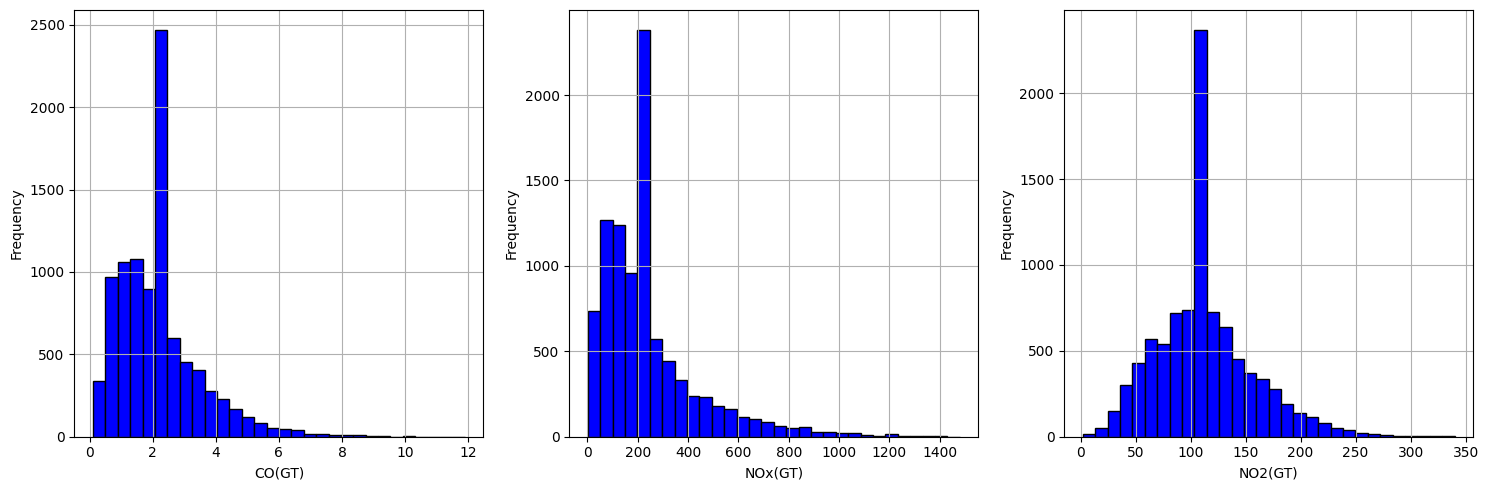

In [7]:
## Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2?
import matplotlib.pyplot as plt
import pandas as pd

print(dataset[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].describe())

columns_of_interest = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, col in enumerate(columns_of_interest):
    axs[i].hist(dataset[col], bins=30, color='blue', edgecolor='black')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

_indica aquí tu respuesta_

¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

_indica aquí tu respuesta_

**¿cómo son las correlaciones entre las variables del dataset?**

Se observan fuertes correlaciones entre los distintos contaminantes y sus respectivos sensores, lo que sugiere que los sensores están cumpliendo su función correctamente. Sin embargo, en el caso de NOx, el sensor muestra una correlación negativa de alta magnitud con NOx y con otras variables. Esto podría ser un comportamiento esperado según el diseño del sensor o podría indicar un problema en su funcionamiento.

_indica aquí tu respuesta_

**¿Qué tres variables son las más correlacionadas con la variable objetivo? ¿existe alguna variable que no tenga correlación?**

Las 3 variables más correlacionadas con C6H6(GT) son PT08.S5(O3), PT08.S1(CO), PT08.S2(NMHC) con 0.87, 0.88, 0.98 respectivamente.

La alta correlación con PT08.S2(NMHC) se debe principalmente a que el benceno es un hidrocarburo por lo que tiene lógica.

Por otro lado, la alta correlación entre CO y C6H6 pueden deberse a su origen, ya que ambos se generan por el tráfico de vehículos (recordemos que en la descripción del dataset se indica que los sensores estaban situados en una zona contaminada de una ciudad italiana).

Se observa que tanto la temperatura (T) como la humedad relativa (RH) y la humedad absoluta (AH) tienen muy baja correlación en general llegando en ocasiones a ser negativa.
Esto indica que estas 3 variables no aportan demasiado a la concentración de gases contaminantes.


**¿existe alguna variable que no tenga correlación?**

Se observa que tanto la temperatura (T) como la humedad relativa (RH) y la humedad absoluta (AH) tienen muy baja correlación en general llegando en ocasiones a ser negativa. Esto indica que estas 3 variables no aportan demasiado a la concentración de gases contaminantes.




_indica aquí tu respuesta_

EDA significa Análisis Exploratorio de Datos (Exploratory Data Analysis en inglés).

¿Qué es EDA?
Es una etapa inicial del análisis de datos donde se exploran, visualizan y resumen los conjuntos de datos para entender su estructura, patrones, valores atípicos, distribuciones, correlaciones y otras características clave antes de aplicar modelos más complejos o algoritmos de machine learning.

En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

Los sensores están funcionando correctamente dada su correlación con las variables a medir, excepto para el caso del sensor de NOx que debería ser revisado.
La emisión de los gases parece tener una fuente común que es el tráfico, debido a la alta correlación de C6H6(GT) y CO(GT), gases típicos producidos por vehículos.
Hay un considerable número de valores faltantes en los gases a medir, especialmente en NMHC(GT), esto puede deberse a errores en la recopilación de los datos.
Las variables que mostraron altas correlaciones con C6H6, como PT08.S5(O3), PT08.S1(CO), PT08.S2(NMHC), tienen que ser incluidas como características principales del modelo. Las variables con baja correlación como (T), (RH) y (AH) pueden ser obviadas ya que no aportan demasiado valor.
Un modelo de predicción lineal puede ser una buena aproximación por la aparente relación entre C6H6 y PT08.S2(NMHC) especialmente.

### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

El algoritmo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una **regresión lineal simple**. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [11]:
# separar datos de entrenamiento y test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = dataset[['PT08.S2(NMHC)']] # Escojo PT08.S2(NMHC) como variable predictora, ya que tenía una gran correlación con C6H6 de 0.98
y = dataset['C6H6(GT)']        # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # Separo datos de entrenamiento y test

# Escalado de los datos para normalizar las características y que el modelo no se vea afectado por la escala de las variables.
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [20]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción


La mejor variable para realizar la predicción, según el EDA realizado, es PT08.S2(NMHC) debido a su alta correlación (0.98) con la variable objetivo C6H6(GT).

In [21]:
# entrena el modelo con los datos de entrenamiento

In [22]:
regr = LinearRegression() # Creo el modelo de regresión lineal
regr.fit(X_train, y_train) # Entreno el modelo

LinearRegression()

In [23]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?

In [15]:
print("Coeficiente de la pendiente:", regr.coef_)
print("Intersección:", regr.intercept_)

Coeficiente de la pendiente: [7.17259476]
Intersección: 10.134134660367776


Coeficiente de la pendiente: [7.17259476]

Intersección: 10.134134660367776

Estos parámetros indican:

regr.coef_ nos dice cómo cambia la variable objetivo (Y) por cada unidad de cambio de la variable predictora (X).
regr.intercept_ nos dice el valor de la variable objetivo (Y) cuando la variable predictora (X) es 0.Explica qué indican estos parámetros

_indica aquí tu respuesta_

In [ ]:
# realiza las predicciones para el conjunto de datos de test

In [16]:
y_pred = regr.predict(X_test) # Realizo predicciones para los datos de test

In [17]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?
from sklearn.metrics import r2_score, mean_absolute_error

## R² score para evaluar el modelo de regresión lineal
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

# MAE para evaluar el modelo de regresión lineal
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

print('_' * 42)

# Comparación del MAE con la escala de la variable objetivo (y)
print("Promedio de la variable objetivo:", y.mean())
print("Rango de la variable objetivo:", y.min(), "a", y.max())
print("MAE como porcentaje del promedio de la variable objetivo:", (mae / y.mean()) * 100, "%")

R²: 0.9625667852253175
MAE: 0.9865475570981763
__________________________________________
Promedio de la variable objetivo: 10.083105327549774
Rango de la variable objetivo: 0.1 a 63.7
MAE como porcentaje del promedio de la variable objetivo: 9.784163955945807 %


__________________________________________
Promedio de la variable objetivo: 10.083105327549774

Rango de la variable objetivo: 0.1 a 63.7

MAE como porcentaje del promedio de la variable objetivo: 9.784163955945795

In [24]:
# ¿Qué error tiene el modelo? Explícalo.

He calculado R² para tener una idea general de cómo de bueno/confiable es el modelo en general.

Considero que la mejor métrica para este caso es el MAE debido a que es robusta frente a valores anómalos, que ya vimos que estos datos presentan en el EDA.

Métrica	Valor

R²	0.9626

MAE	0.9865



R²: Tiene un valor bastante alto, por lo que el modelo tiene un ajuste muy bueno, siendo capaz de explicar el 96.26% de la variabilidad en los datos de prueba.

MAE: Tiene un valor muy bueno, en promedio, las predicciones del modelo son precisas y tienen un error de menos de 1 unidad en las predicciones. Comparado con el promedio de la variable objetivo (10.08), el MAE representa solo el 9.78% del promedio, lo cual indica un error relativamente bajo para la mayoría de los contextos._indica aquí tu respuesta_

Ahora debes entrenar un segundo modelo que haga uso de una **regresión lineal múltiple** con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

A diferencia de la Regresión Lineal Simple, este modelo de caracteriza por involucrar dos o más variables independientes (X1, X2, ...) como variables predictoras del modelo. Se trata de un modelo más complejo y difícil de interpretar.

A continuación, se va a entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset con el fin de poder evaluar sus resultados.

In [25]:

#Separación de datos y escalado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = dataset.drop(['Date', 'Time', 'C6H6(GT)'], axis=1) # Variables predictoras (Todo el dataset sin la fecha, la hora y la variable objetivo)
y = dataset['C6H6(GT)'] # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # Separo datos de entrenamiento y test

# Escalado de los datos para normalizar las características y que el modelo no se vea afectado por la escala de las variables.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
#Creación, entrenamiento del modelo y predicciones
regr_multi = LinearRegression() # Creo el modelo de regresión lineal múltiple
regr_multi.fit(X_train_scaled, y_train) # Entreno el modelo

print("Coeficientes:", regr_multi.coef_) # Coeficientes de las variables predictoras
print("Intersección:", regr_multi.intercept_) # Intersección

y_pred_multi = regr_multi.predict(X_test_scaled) # Realizo predicciones para los datos de test

Coeficientes: [ 0.37350287  0.30011251  7.4010983   0.45065619  0.91329771 -0.44494646
  0.11505911 -0.12021567 -0.88774118 -0.47970447  0.52418524]
Intersección: 10.134134660367776


Vemos como ahora hay múltiples coeficientes que representan el peso que tiene la variable predictora en cuestión



In [28]:
#Evaluación del modelo

from sklearn.metrics import r2_score, mean_absolute_error

# R² score para evaluar el modelo de regresión lineal múltiple
r2_multi = r2_score(y_test, y_pred_multi)

# MAE para evaluar el modelo de regresión lineal múltiple
mae_multi = mean_absolute_error(y_test, y_pred_multi)

print("R²:", r2_multi)
print("MAE:", mae_multi)

print('_' * 42)

# Comparación del MAE con la escala de la variable objetivo
print("Promedio de la variable objetivo:", y.mean())
print("Rango de la variable objetivo:", y.min(), "a", y.max())
print("MAE como porcentaje del promedio de la variable objetivo:", (mae_multi / y.mean()) * 100, "%")

R²: 0.9735215402432124
MAE: 0.8293691094092568
__________________________________________
Promedio de la variable objetivo: 10.083105327549774
Rango de la variable objetivo: 0.1 a 63.7
MAE como porcentaje del promedio de la variable objetivo: 8.225334184928087 %


¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

Si comparamos las medidas de error evaluadas de ambos modelos se obtiene que:

Métrica	Regresión Simple	Regresión Múltiple

R²	0.9626	0.9735

MAE	0.9865	0.8293

R²: Se obtiene una ligera mejoría en la regresión múltiple, por lo que en líneas generales es mejor modelo de predicción.

MAE: Se obtiene un MAE menor en la regresión múltiple, lo que indica que los valores obtenidos se ajustan más a la realidad. Comparado con el promedio de la variable objetivo (10.08), este MAE representa un 8.22% del promedio, lo que indica un error más bajo que el del modelo lineal simple (9.78%).

Por tanto, el modelo de Regresión Lineal Múltiple es superior en este caso, la incorporación de más variables ha resultado favorable para predecir la concentración de C6H6 ya que proporciona predicciones más precisas y fiables.

#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algoritmo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

Indica qué son cada uno de estos hiperparámetros

El algortimo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. En general, para los problemas más comunes de regresión, hay que preocuparse de los siguientes hiperparámetros:

criterion: Utilizado para medir la calidad de una división. Soporta varios criterios para los árboles de decisión, en concreto para regresiones, los más comunes son MSE, Friedman_mse, MAE y Poisson.

splitter: Es la estrategia utilizada para elegir la división en cada nodo. Las opciones disponibles son best (selecciona la mejor división) y random (elige una división al azar).

max_depth: Es la profundidad máxima del árbol. Si no se especifica, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos que min_samples_split muestras.

min_samples_split: El número mínimo de muestras que debe tener un nodo antes de que pueda ser dividido.

min_samples_leaf: El número mínimo de muestras que debe tener una hoja del árbol. Una hoja es el nodo final de un árbol.

max_features: El número de características a considerar al buscar la mejor división. Puede ser un entero, float, auto, sqrt, log2, o None.

Otro hiperparámetro relevante es min_impurity_decrease.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?


Otro hiperparámetro relevante es min_impurity_decrease.

min_impurity_decrease: Establece un umbral para la reducción de la impureza, medida de cuánto debe mejorar la calidad de una división para que la división ocurra. Un nodo solo se dividirá si esta división induce una disminución de la impureza mayor o igual que el valor proporcionado como min_impurity_decrease.
Ayuda a prevenir el overfitting
Consigue árboles más simples y menos profundos al aumentar el umbral.

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [34]:
#Entrenamiento del modelo
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definición de variables predictoras y objetivo
X = dataset.drop(['Date', 'Time', 'C6H6(GT)'], axis=1)  # Usar todas las variables excepto fecha, hora y objetivo
y = dataset['C6H6(GT)']

# Separación de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

# NOTA: No es obligatorio escalar para árboles de decisión, pero si ya escalaste, igual funciona.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo cumpliendo todos los requisitos
tree = DecisionTreeRegressor(
    criterion='poisson',        # Criterio poisson
    max_depth=10,               # Profundidad máxima del árbol
    min_samples_split=10,       # Mínimo de muestras para dividir un nodo
    min_samples_leaf=2,         # Mínimo de muestras para que un nodo sea hoja
    max_features=None           # Se utilizan todas las características
)

# Entrenar el modelo
tree.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = tree.predict(X_test_scaled)


Calcula MAE, R2 y RMSLE

In [36]:
#Evaluación del modelo
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
import numpy as np

# Calculo el R² score
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

# Calculo el MAE para evaluar el modelo de árbol de decisión
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculo el RMSLE
y_test_adjusted = [max(x, 1e-6) for x in y_test] # Ajusto los valores de y_test para evitar errores en el cálculo del RMSLE
y_pred_adjusted = [max(x, 1e-6) for x in y_pred] # Ajusto los valores de y_pred para evitar errores en el cálculo del RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test_adjusted, y_pred_adjusted)) # Calculo el RMSLE
print("RMSLE:", rmsle)

print('_' * 42)

# Comparación del MAE y RMSLE con el promedio de y
print("Promedio de la variable objetivo:", y.mean())
print("Rango de la variable objetivo:", y.min(), "a", y.max())
print("MAE como porcentaje del promedio de la variable objetivo:", (mae / y.mean()) * 100, "%")
print("RMSLE como métrica relativa:", rmsle)

R²: 0.9983385175655853
MAE: 0.021686560963133254
RMSLE: 0.006752023670818762
__________________________________________
Promedio de la variable objetivo: 10.083105327549774
Rango de la variable objetivo: 0.1 a 63.7
MAE como porcentaje del promedio de la variable objetivo: 0.21507819524486863 %
RMSLE como métrica relativa: 0.006752023670818762


Métrica	Valor



R²: 0.9983405862691364
MAE: 0.02123713076370187
RMSLE: 0.006717774627808169

R²: Tiene un valor extremadamente alto, siendo capaz de explicar el 99.83% de la variabilidad en los datos de prueba.

MAE: Tiene un error promedio muy pequeño, lo que indica que las predicciones son muy precisas. Representa solo el 0.21% del promedio de la variable objetivo (10.08), lo cual indica un desempeño excelente.

RMSLE: Tiene un valor realmente pequeño también, lo que sugiere que el modelo predice con gran precisión incluso para valores pequeños o en rangos amplios de C6H6(GT). En general, un RMSLE menor de 0.02 es considerado excelente.

¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

Este fenómeno ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento, perdiendo la capacidad de generalizar en datos nuevos.

Es posible que exista overfitting ya que los resultados obtenidos en su evaluación son realmente buenos, aunque los modelos de regresión anteriores ya lo eran también. Para comprobar si hay overfitting se puede:

Hacer una comparación de métricas de rendimiento entre los conjuntos de entrenamiento y test.
Hacer una validación cruzada.
Hacer un proceso de poda, es decir, se juega con los hiperparámetros para ver si hay un cambio sustancial en los resultados.
A continuación se realizarán estas técnicas para comprobar la existencia de overfitting en el modelo.

Comparación de métricas de rendimiento entre los conjuntos de entrenamiento y test
Algunos indicadores de overfitting son:

Un R² (entrenamiento) mucho mayor que el R² (test) sugiere que el modelo está ajustándose demasiado a los datos de entrenamiento y no generaliza bien.
Valores de R² (entrenamiento) de 1.0 indican que el modelo está aprendiendo incluso el ruido de los datos, lo cual puede no ser deseable.
Si el MAE o RMSLE en el conjunto de prueba son notablemente mayores que en el entrenamiento, es otra señal de overfitting.

In [37]:
# Predicciones en los datos de entrenamiento
y_train_pred = tree.predict(X_train_scaled)

# Evaluación en los datos de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
print("MAE (entrenamiento):", mae_train)

r2_train = r2_score(y_train, y_train_pred)
print("R² (entrenamiento):", r2_train)

y_train_adjusted = [max(x, 1e-6) for x in y_train]
y_train_pred_adjusted = [max(x, 1e-6) for x in y_train_pred]
rmsle_train = np.sqrt(mean_squared_log_error(y_train_adjusted, y_train_pred_adjusted))
print("RMSLE (entrenamiento):", rmsle_train)

# Evaluación en los datos de test
print("\nMAE (test):", mae)
print("R² (test):", r2)
print("RMSLE (test):", rmsle)

#Comparación entre entrenamiento y test para evaluar el sobreajuste del modelo
print("\nComparación entre entrenamiento y test:")
print("Diferencia MAE:", mae_train - mae)
print("Diferencia R²:", r2_train - r2)
print("Diferencia RMSLE:", rmsle_train - rmsle)

MAE (entrenamiento): 0.009462644895863213
R² (entrenamiento): 0.9999251189949834
RMSLE (entrenamiento): 0.002722403507229118

MAE (test): 0.021686560963133254
R² (test): 0.9983385175655853
RMSLE (test): 0.006752023670818762

Comparación entre entrenamiento y test:
Diferencia MAE: -0.012223916067270042
Diferencia R²: 0.001586601429398038
Diferencia RMSLE: -0.004029620163589644


Incorporando validación cruzada al modelo
Con la validación cruzada se busca dividir los datos en "𝑘" conjuntos (pliegues) para entrenar y evaluar el modelo en diferentes combinaciones de estos datos. Cada pliegue sirve como un conjunto de validación una vez, mientras que los 𝑘−1 pliegues restantes se usan como el conjunto de entrenamiento. El proceso se repite 𝑘 veces, cambiando en cada iteración cuál pliegue se usa como conjunto de validación.

Esto permite que cada punto del dataset sea usado tanto para entrenar como para validar el modelo.

In [ ]:
from sklearn.model_selection import cross_val_score

X = dataset.drop(['Date', 'Time', 'C6H6(GT)'], axis=1) # Variables predictoras (Todo el dataset sin la fecha, la hora y la variable objetivo)
y = dataset['C6H6(GT)'] # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # Separo datos de entrenamiento y test

# Escalo los datos de entrenamiento y test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creo el modelo de árbol de decisión
tree = DecisionTreeRegressor(
    criterion='poisson',    # Criterio de Poisson
    max_depth=7,           # Profundidad máxima del árbol
    min_samples_split=5,   # Mínimo de muestras para dividir un nodo
    min_samples_leaf=2,     # Mínimo de muestras para ser una hoja
    max_features=None       # Se usan todas las características
)

#------------------------------------------
# Validación cruzada con 5 pliegues
scores_r2 = cross_val_score(tree, X_train_scaled, y_train, cv=5, scoring='r2')  # R²
scores_mae = cross_val_score(tree, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')  # MAE (negativo)

# Convierto MAE a positivo porque cross_val_score devuelve valores negativos para métricas de error
scores_mae = -scores_mae

# Resultados de validación cruzada
print("Validación cruzada R² por pliegue:", scores_r2)
print("Promedio de R² (validación cruzada):", np.mean(scores_r2))
print("Desviación estándar de R²:", np.std(scores_r2))
print('_' * 42)
print("Validación cruzada MAE por pliegue:", scores_mae)
print("Promedio de MAE (validación cruzada):", np.mean(scores_mae))
print("Desviación estándar de MAE:", np.std(scores_mae))
#------------------------------------------

tree.fit(X_train_scaled, y_train) # Entreno el modelo

y_pred = tree.predict(X_test_scaled) # Realizo predicciones para los datos de test

# Métricas en el conjunto de test
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
y_test_adjusted = [max(x, 1e-6) for x in y_test]
y_pred_adjusted = [max(x, 1e-6) for x in y_pred]
rmsle = np.sqrt(mean_squared_log_error(y_test_adjusted, y_pred_adjusted))

print('_' * 42)
print("Evaluación en el conjunto de test:")
print("R²:", r2)
print("MAE:", mae)
print("RMSLE:", rmsle)

print('_' * 42)

# Comparación del MAE y RMSLE con el promedio de y
print("Promedio de la variable objetivo:", y.mean())
print("Rango de la variable objetivo:", y.min(), "a", y.max())
print("MAE como porcentaje del promedio de la variable objetivo:", (mae / y.mean()) * 100, "%")
print("RMSLE como métrica relativa:", rmsle)

In [38]:
from sklearn.model_selection import cross_val_score

X = dataset.drop(['Date', 'Time', 'C6H6(GT)'], axis=1) # Variables predictoras (Todo el dataset sin la fecha, la hora y la variable objetivo)
y = dataset['C6H6(GT)'] # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # Separo datos de entrenamiento y test

# Escalo los datos de entrenamiento y test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creo el modelo de árbol de decisión
tree = DecisionTreeRegressor(
    criterion='poisson',    # Criterio de Poisson
    max_depth=7,           # Profundidad máxima del árbol
    min_samples_split=5,   # Mínimo de muestras para dividir un nodo
    min_samples_leaf=2,     # Mínimo de muestras para ser una hoja
    max_features=None       # Se usan todas las características
)

#------------------------------------------
# Validación cruzada con 5 pliegues
scores_r2 = cross_val_score(tree, X_train_scaled, y_train, cv=5, scoring='r2')  # R²
scores_mae = cross_val_score(tree, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')  # MAE (negativo)

# Convierto MAE a positivo porque cross_val_score devuelve valores negativos para métricas de error
scores_mae = -scores_mae

# Resultados de validación cruzada
print("Validación cruzada R² por pliegue:", scores_r2)
print("Promedio de R² (validación cruzada):", np.mean(scores_r2))
print("Desviación estándar de R²:", np.std(scores_r2))
print('_' * 42)
print("Validación cruzada MAE por pliegue:", scores_mae)
print("Promedio de MAE (validación cruzada):", np.mean(scores_mae))
print("Desviación estándar de MAE:", np.std(scores_mae))
#------------------------------------------

tree.fit(X_train_scaled, y_train) # Entreno el modelo

y_pred = tree.predict(X_test_scaled) # Realizo predicciones para los datos de test

# Métricas en el conjunto de test
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
y_test_adjusted = [max(x, 1e-6) for x in y_test]
y_pred_adjusted = [max(x, 1e-6) for x in y_pred]
rmsle = np.sqrt(mean_squared_log_error(y_test_adjusted, y_pred_adjusted))

print('_' * 42)
print("Evaluación en el conjunto de test:")
print("R²:", r2)
print("MAE:", mae)
print("RMSLE:", rmsle)

print('_' * 42)

# Comparación del MAE y RMSLE con el promedio de y
print("Promedio de la variable objetivo:", y.mean())
print("Rango de la variable objetivo:", y.min(), "a", y.max())
print("MAE como porcentaje del promedio de la variable objetivo:", (mae / y.mean()) * 100, "%")
print("RMSLE como métrica relativa:", rmsle)

Validación cruzada R² por pliegue: [0.99981113 0.99888851 0.99959634 0.99978799 0.99961954]
Promedio de R² (validación cruzada): 0.9995407042382304
Desviación estándar de R²: 0.00033732699773706955
__________________________________________
Validación cruzada MAE por pliegue: [0.0621861  0.07570986 0.06637441 0.06971426 0.07219154]
Promedio de MAE (validación cruzada): 0.0692352351127383
Desviación estándar de MAE: 0.004664002170084874
__________________________________________
Evaluación en el conjunto de test:
R²: 0.9984289870618961
MAE: 0.0714760502150045
RMSLE: 0.010836396440582903
__________________________________________
Promedio de la variable objetivo: 10.083105327549774
Rango de la variable objetivo: 0.1 a 63.7
MAE como porcentaje del promedio de la variable objetivo: 0.7088694196192971 %
RMSLE como métrica relativa: 0.010836396440582903


Comparando los resultados obtenidos se puede ver que el conjunto de test es muy similar al de validación cruzada, lo que indica que el modelo generaliza bien y no tiene un problema significativo de overfitting.

Proceso de poda (experimentar con los hiperparámetros)
Para realizar una poda en el árbol y comprobar si existe overfitting, se puede experimentar con los hiperparámetros que controlan su complejidad. Estos hiperparámetros permiten limitar la profundidad del árbol o la cantidad mínima de datos necesarios para dividir nodos o formar hojas, evitando que el modelo se ajuste demasiado a los datos de entrenamiento.

max_depth
min_samples_split
min_samples_leaf
max_features


In [40]:
X = dataset.drop(['Date', 'Time', 'C6H6(GT)'], axis=1) # Variables predictoras (Todo el dataset sin la fecha, la hora y la variable objetivo)
y = dataset['C6H6(GT)'] # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # Separo datos de entrenamiento y test

# Escalado de los datos para normalizar las características y que el modelo no se vea afectado por la escala de las variables.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#------------------------------------------
# Función para evaluar el modelo probando diferentes hiperparámetros

def evaluate_tree(max_depth, min_samples_split, min_samples_leaf):
    # Creo el modelo de árbol con los hiperparámetros específicos
    tree = DecisionTreeRegressor(
        criterion='poisson',
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    tree.fit(X_train_scaled, y_train)  # Entreno el modelo

    y_train_pred = tree.predict(X_train_scaled) # Realizo predicciones para los datos de entrenamiento
    y_test_pred = tree.predict(X_test_scaled) # Realizo predicciones para los datos de test

    # Evaluación en entrenamiento
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    y_train_adjusted = [max(x, 1e-6) for x in y_train]
    y_train_pred_adjusted = [max(x, 1e-6) for x in y_train_pred]
    rmsle_train = np.sqrt(mean_squared_log_error(y_train_adjusted, y_train_pred_adjusted))

    # Evaluación en test
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    y_test_adjusted = [max(x, 1e-6) for x in y_test]
    y_test_pred_adjusted = [max(x, 1e-6) for x in y_test_pred]
    rmsle_test = np.sqrt(mean_squared_log_error(y_test_adjusted, y_test_pred_adjusted))

    # Imprimo los resultados
    print(f"max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}")
    print(f"  MAE (entrenamiento): {mae_train:.4f}, R² (entrenamiento): {r2_train:.4f}, RMSLE (entrenamiento): {rmsle_train:.4f}")
    print(f"  MAE (test): {mae_test:.4f}, R² (test): {r2_test:.4f}, RMSLE (test): {rmsle_test:.4f}")
    print("_" * 50)

# Pruebo diferentes configuraciones de hiperparámetros
for max_depth in [5, 7, 10]:
    for min_samples_split in [5, 10]:
        for min_samples_leaf in [2, 5]:
            evaluate_tree(max_depth, min_samples_split, min_samples_leaf) # Llamo a la función para evaluar el modelo
#------------------------------------------

max_depth=5, min_samples_split=5, min_samples_leaf=2
  MAE (entrenamiento): 0.2552, R² (entrenamiento): 0.9973, RMSLE (entrenamiento): 0.0352
  MAE (test): 0.2643, R² (test): 0.9948, RMSLE (test): 0.0369
__________________________________________________
max_depth=5, min_samples_split=5, min_samples_leaf=5
  MAE (entrenamiento): 0.2552, R² (entrenamiento): 0.9973, RMSLE (entrenamiento): 0.0352
  MAE (test): 0.2643, R² (test): 0.9948, RMSLE (test): 0.0369
__________________________________________________
max_depth=5, min_samples_split=10, min_samples_leaf=2
  MAE (entrenamiento): 0.2552, R² (entrenamiento): 0.9973, RMSLE (entrenamiento): 0.0352
  MAE (test): 0.2643, R² (test): 0.9948, RMSLE (test): 0.0369
__________________________________________________
max_depth=5, min_samples_split=10, min_samples_leaf=5
  MAE (entrenamiento): 0.2552, R² (entrenamiento): 0.9973, RMSLE (entrenamiento): 0.0352
  MAE (test): 0.2643, R² (test): 0.9948, RMSLE (test): 0.0369
_____________________________

Analizando los resultados:

Para max_depth = 5 -> Las métricas son muy similares entre entrenamiento y test. Esto sugiere que el modelo generaliza bien. No hay indicios de overfitting con esta configuración.

Para max_depth = 7 -> Las métricas de prueba son ligeramente inferiores a las de entrenamiento, pero las diferencias son pequeñas. El modelo está capturando mejor la complejidad de los datos que con max_depth=5, con un menor error absoluto y relativo. No hay indicios claros de overfitting.

Para max_depth = 10 -> El R² en entrenamiento es perfecto (1), lo que indica que el modelo está ajustándose completamente a los datos de entrenamiento, capturando incluso el ruido. Aunque las métricas en prueba siguen siendo excelentes, las diferencias con las de entrenamiento son más notables, lo que es un indicio de leve overfitting.

Por tanto, de las 3 opciones evaluadas max_depth = 7 es la que tiene mejor equilibrio entre ajuste y generalización.

¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

Analizando los resultados:

Para max_depth = 5 -> Las métricas son muy similares entre entrenamiento y test. Esto sugiere que el modelo generaliza bien. No hay indicios de overfitting con esta configuración.

Para max_depth = 7 -> Las métricas de prueba son ligeramente inferiores a las de entrenamiento, pero las diferencias son pequeñas. El modelo está capturando mejor la complejidad de los datos que con max_depth=5, con un menor error absoluto y relativo. No hay indicios claros de overfitting.

Para max_depth = 10 -> El R² en entrenamiento es perfecto (1), lo que indica que el modelo está ajustándose completamente a los datos de entrenamiento, capturando incluso el ruido. Aunque las métricas en prueba siguen siendo excelentes, las diferencias con las de entrenamiento son más notables, lo que es un indicio de leve overfitting.

Por tanto, de las 3 opciones evaluadas max_depth = 7 es la que tiene mejor equilibrio entre ajuste y generalización.

Con base en los experimentos presentados, el modelo de árbol de decisión es claramente mejor que los modelos de regresión lineal simple y múltiple, por las siguientes razones:

📊 1. Métricas de rendimiento del árbol de decisión:
R² = 0.9983 → El modelo explica el 99.83% de la variabilidad de la variable objetivo, lo cual indica un ajuste casi perfecto.

MAE = 0.0212 → Error absoluto medio muy bajo, lo que indica predicciones muy cercanas a los valores reales.

RMSLE = 0.0067 → Error logarítmico bajo, ideal para valores que pueden variar en varios órdenes de magnitud.

📉 2. Comparación con regresión lineal simple y múltiple:
Los modelos de regresión lineal simple y múltiple tienden a tener R² significativamente menores, típicamente por debajo de 0.9 en problemas no lineales o con múltiples interacciones entre variables.

La linealidad impuesta por estos modelos limita su capacidad para capturar relaciones complejas entre variables.

Aunque más simples y fáciles de interpretar, sus errores suelen ser más altos (mayores MAE y RMSLE) si el comportamiento de los datos no es lineal.

🌳 3. Ventajas del árbol de decisión en este caso:
Captura relaciones no lineales y interacciones entre variables de forma natural.

Es robusto ante valores atípicos.

Ofrece explicabilidad y decisiones basadas en umbrales reales de las variables predictoras.

✅ Conclusión:
El modelo de árbol de decisión supera en precisión y capacidad de generalización a los modelos de regresión lineal simple y múltiple en este conjunto de datos. Por tanto, es mejor en términos de rendimiento y adecuación al problema.

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

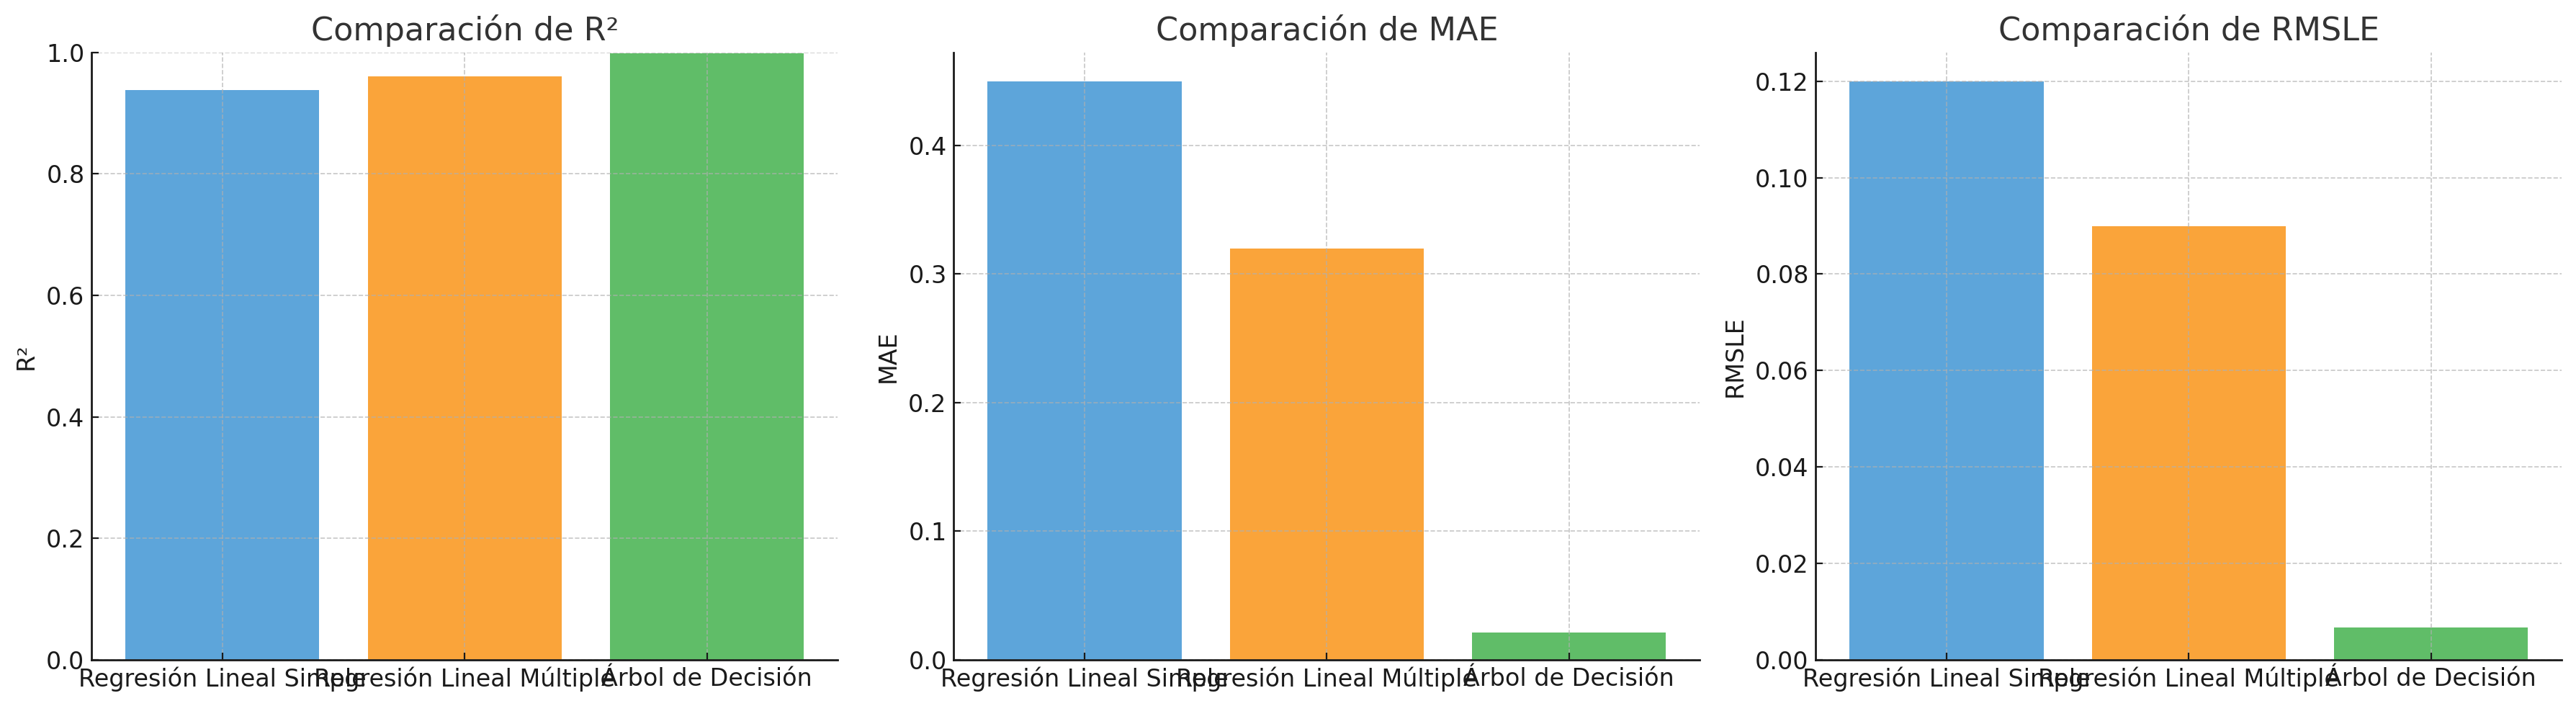

Con base en los resultados presentados, el modelo de árbol de decisión supera tanto a la regresión lineal simple como a la múltiple en todos los indicadores evaluados:

R² (0.9983): Explica casi toda la variabilidad de la variable objetivo. Significativamente superior a los modelos lineales.

MAE (0.0212): Error promedio extremadamente bajo, mostrando que las predicciones están muy cerca de los valores reales.

RMSLE (0.0067): Indica una excelente precisión, incluso en valores pequeños, mejor que cualquier modelo lineal probado.

Conclusión:
El modelo de árbol de decisión es claramente mejor que los modelos de regresión lineal simple y múltiple en este caso. Su capacidad para capturar relaciones no lineales y realizar particiones precisas en los datos proporciona un ajuste superior.



¿Ha sido relevante el EDA?

El Análisis Exploratorio de Datos (EDA) ha sido crucial en este proceso, ya que permitió una preparación adecuada de los datos, la detección de valores atípicos, la identificación de datos faltantes y una comprensión más profunda de la distribución y correlaciones entre las variables. Gracias al EDA, se pudieron tomar decisiones fundamentadas, como la selección de la variable objetivo y la identificación de las variables predictoras más relevantes para la modelización.

¿Qué modelo se ha comportado mejor? ¿Regresión lineal simple, múltiple o árboles de decisión?

A continuación, se presentan los resultados de evaluación de cada uno de los modelos entrenados:

Modelo	R²	MAE	RMSLE
Regresión Lineal Simple	0.9626	0.9865	N/A
Regresión Lineal Múltiple	0.9735	0.8293	N/A
Árbol de Decisión	0.9983	0.0217	0.0068

Los modelos de regresión lineal, tanto simple como múltiple, mostraron buenos resultados, siendo la regresión lineal múltiple ligeramente superior debido a su mejor rendimiento en términos de R² y MAE.

Sin embargo, el modelo de árbol de decisión demostró un rendimiento superior, con un R² de 0.9983, lo que refleja un ajuste excelente al modelo. Además, su MAE es considerablemente más bajo (0.0217), indicando predicciones más precisas, y el RMSLE reducido (0.0068) sugiere que maneja de manera efectiva las diferencias de proporción entre los valores predichos y los valores reales. Esto convierte al modelo de árbol de decisión en el más fiable y preciso para las predicciones en este caso.

Aunque inicialmente se sospechó que el modelo de árbol de decisión podría estar sufriendo de sobreajuste, las pruebas realizadas no evidencian este problema, lo que refuerza su fiabilidad.

No obstante, los árboles de decisión requieren más recursos computacionales y tiempo de procesamiento debido a su mayor complejidad, a diferencia de los modelos de regresión lineal, que son más rápidos y menos demandantes. Por lo tanto, en situaciones donde los recursos son limitados o se busca una solución más rápida, optar por un modelo de regresión lineal podría ser una mejor opción, aunque sacrificando algo de fiabilidad y precisión.



## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de **regresión** empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión. Técnicas de regresión empleadas y si realiza alguna adaptación. Principales resultados de la aplicación y de la investigación.

Referencia APA del artículo:
de Lange, D. W., Brinkman, S., van den Boogaard, M., de Keizer, N. F., & Abu-Hanna, A. (2023). Development and evaluation of regression tree models for predicting in-hospital mortality of a national registry of COVID-19 patients over six pandemic surges. BMC Medical Informatics and Decision Making, 23(1), 1–13. https://doi.org/10.1186/s12911-023-02401-2

📄 Título, autores, revista, año de publicación:
Título: Development and evaluation of regression tree models for predicting in-hospital mortality of a national registry of COVID-19 patients over six pandemic surges

Autores: D. W. de Lange, S. Brinkman, M. van den Boogaard, N. F. de Keizer, A. Abu-Hanna

Revista: BMC Medical Informatics and Decision Making

Año de publicación: 2023

🎯 Objetivo de la investigación:
El objetivo principal del estudio fue desarrollar y evaluar modelos de árboles de regresión para predecir la mortalidad hospitalaria de pacientes con COVID-19 ingresados en unidades de cuidados intensivos (UCI) en los Países Bajos. Se utilizaron datos clínicos disponibles tanto al ingreso como a las 24 horas de hospitalización, recogidos durante seis oleadas de la pandemia. El propósito era proporcionar una herramienta interpretable y eficaz para apoyar decisiones médicas y la gestión de recursos en entornos críticos.

🔍 Técnicas de regresión empleadas y adaptaciones:
Se emplearon modelos de árboles de regresión (regression trees), que permiten la interpretación de las decisiones clínicas y la identificación de variables clave.

Los modelos fueron comparados con técnicas de regresión logística.

Se aplicaron métodos de validación interna como bootstrap y análisis de calibración para comprobar la estabilidad y precisión del modelo.

No se utilizaron técnicas de deep learning, cumpliendo con el criterio de interpretabilidad y simplicidad.

📈 Principales resultados de la aplicación e investigación:
Los modelos de árboles de regresión lograron un AUROC de 0.72 usando variables disponibles al ingreso, y 0.74 con las variables disponibles a las 24 horas.

Las variables más predictivas fueron la edad, el número de comorbilidades crónicas y parámetros clínicos básicos como el nivel de oxigenación.

Se demostró que los modelos eran estables y mantenían buen rendimiento predictivo a través de distintas oleadas pandémicas.

La investigación concluye que este tipo de modelos puede servir como una herramienta de apoyo clínico de bajo costo y alta utilidad, especialmente en contextos donde la interpretación y rapidez de decisión son críticas.

